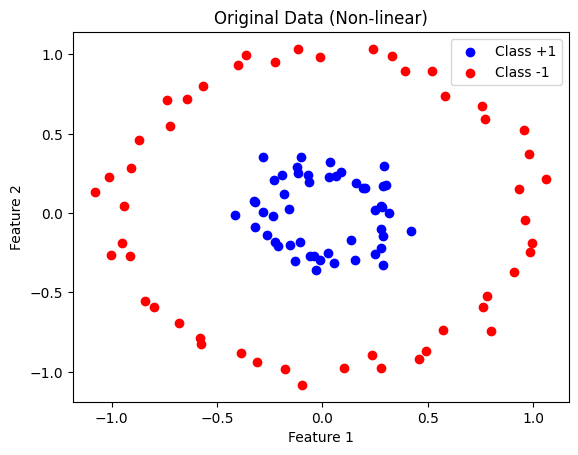

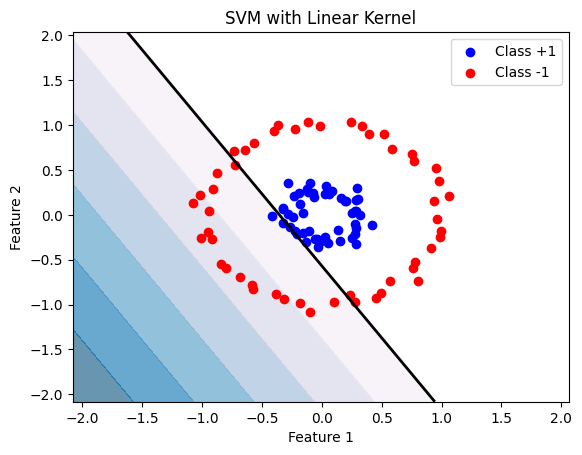

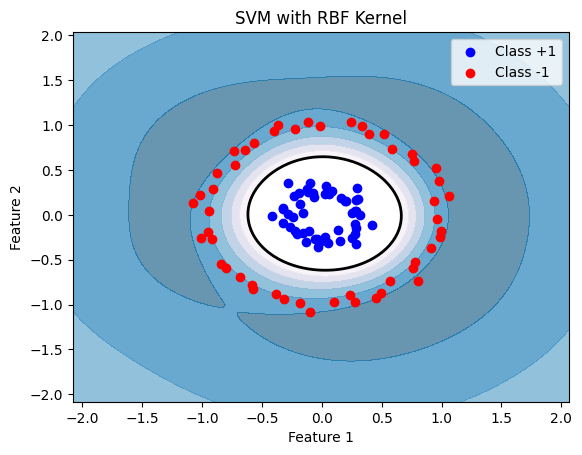

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# 1. 간단한 데이터 생성: 원형으로 분포된 두 클래스 데이터
X, y = make_circles(n_samples=100, factor=0.3, noise=0.05, random_state=42)
y = np.where(y == 0, -1, 1)  # SVM을 위한 레이블 변환 (-1, +1)

# 2. 데이터 시각화
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.title("Original Data (Non-linear)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# 3. SVM 모델 (커널 사용)
# Linear Kernel
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X, y)

# RBF Kernel (Gaussian Kernel)
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # gamma='scale'은 자동으로 데이터에 맞게 설정
rbf_svm.fit(X, y)

# 4. 결정 경계 시각화
def plot_decision_boundary(svm, X, y, title):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu_r, alpha=0.6)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 5. 시각화: Linear Kernel
plot_decision_boundary(linear_svm, X, y, "SVM with Linear Kernel")

# 6. 시각화: RBF Kernel
plot_decision_boundary(rbf_svm, X, y, "SVM with RBF Kernel")
